# 1. 서울시 구별 CCTV 현황 분석
---

        - http://opengov.seoul.go.kr   <서울시 구별 cctv 현황>
        - http://stat.seoul.go.kr      <인구 수>

In [171]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"] = False

---
## 1) 데이터 수집
     
     - 과정에 대한 설명

In [3]:
# CCTV 자료 불러오기 

cctv_seoul = pd.read_csv("data/seoul/cctv.csv")   
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
# 인구수 자료 불러오기 

pop_seoul = pd.read_excel('data/seoul/Report.xls',usecols= "B,D,G,J,N",header = 2) # 엑셀에서 필요한 것만 가져오는 함수 
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


---
## 2) 전처리 
    

In [39]:
# 컬럼 이름 변경

# CCTV자료에서 기관명이라는 컬럼명을 "구별"로 변경

cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head()
#cctv_seoul.rename(columns={"기관명":'구별'}, inplace=True)
# 인구수 데이터에서 컬럼명을 각각 구별, 인구수, 한국인, 외국인, 고령자로 변경

# pop_seoul.rename(columns={pop_seoul.columns[0]:"구별",
#                           pop_seoul.columns[1]:"인구수",
#                           pop_seoul.columns[2]:"한국인",
#                           pop_seoul.columns[3]:"외국인",
#                           pop_seoul.columns[4]:"고령자"}, inplace=True)
pop_seoul.rename(columns={"자치구":"구별",
                          "계":"인구수",
                          "계.1":"한국인",
                          "계.2":"외국인",
                          "65세이상고령자":"고령자"}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 3) 탐색적 데이터 분석

In [22]:
# 어느 구가 가장 CCTV가 많이 설치되어 있는가?(가장 적게 설치된 곳은 어디인가?) sort

# CCTV가 데이터에서 소계를 기준으로 정령(5개 구 확인)

print(cctv_seoul.sort_values(by="소계",ascending = False).head(5))
print("------------------------------------------------------------")
print(cctv_seoul.sort_values(by="소계",ascending = True).head(5))

     구별    소계  2013년도 이전  2014년  2015년  2016년
0   강남구  3238       1292    430    584    932
18  양천구  2482       1843    142     30    467
14  서초구  2297       1406    157    336    398
4   관악구  2109        846    260    390    613
21  은평구  2108       1138    224    278    468
------------------------------------------------------------
     구별   소계  2013년도 이전  2014년  2015년  2016년
9   도봉구  825        238    159     42    386
2   강북구  831        369    120    138    204
5   광진구  878        573     78     53    174
3   강서구  911        388    258    184     81
24  중랑구  916        509    121    177    109


In [41]:
# CCTV 설치 증가율을 알아보자 
# CCTV 설치 연도별 증가율을 구해서 "최근증가율" 컬럼 새로 추가 
# (2014 + 2015 + 2016 /  2013년도 이전) * 100

cctv_seoul["최근증가율"]= ((cctv_seoul["2014년"]+cctv_seoul["2015년"]+cctv_seoul["2016년"])/cctv_seoul["2013년도 이전"])*100

print(cctv_seoul.sort_values(by="최근증가율",ascending=False).head(5))
print("--------------------------------------------------------------------")
print(cctv_seoul.sort_values(by="최근증가율",ascending=True).head(5))

     구별    소계  2013년도 이전  2014년  2015년  2016년       최근증가율
22  종로구  1619        464    314    211    630  248.922414
9   도봉구   825        238    159     42    386  246.638655
12  마포구   980        314    118    169    379  212.101911
8   노원구  1566        542     57    451    516  188.929889
1   강동구  1010        379     99    155    377  166.490765
--------------------------------------------------------------------
      구별    소계  2013년도 이전  2014년  2015년  2016년      최근증가율
18   양천구  2482       1843    142     30    467  34.671731
13  서대문구  1254        844     50     68    292  48.578199
20   용산구  2096       1368    218    112    398  53.216374
5    광진구   878        573     78     53    174  53.228621
14   서초구  2297       1406    157    336    398  63.371266


In [55]:
# 인구수 데이터 분석 

# 필요없는 행 삭제 : del() , drop()
pop_seoul.drop([0],inplace=True)
pop_seoul.head()



array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [58]:
# 구별 데이터의 중복이나 결측치등을 확인 : unique()
pop_seoul['구별'].unique()
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [59]:
pop_seoul.drop([26],inplace=True)
pop_seoul['구별'].unique()
# pop_seoul.dropna()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [65]:
# 어느 국 인구수가 가장 많은가?( 가장 적은곳 )
print(pop_seoul.sort_values(by = '인구수' ,ascending=True).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '인구수' ,ascending=False).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '외국인' ,ascending=True).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '외국인' ,ascending=False).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '고령자' ,ascending=True).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '고령자' ,ascending=False).head())



     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
3   용산구  245411  229909  15502  37238
18  금천구  253344  234238  19106  34640
4   성동구  314551  306532   8019  41752
--------------------------------------------------------
     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
--------------------------------------------------------
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
11  노원구  555803  551902  3901  75081
25  강동구  438225  434027  4198  56983
--------------------------------------------------------
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  3

In [69]:
# 외국인 비율, 고령자 비율 컴럼을 추가해서 순위확인

pop_seoul["외국인 비율"]= (pop_seoul['외국인']/pop_seoul["인구수"])*100
pop_seoul["고령자 비율"]= (pop_seoul['고령자']/pop_seoul["인구수"])*100

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
3,용산구,245411,229909,15502,37238,6.316750,15.173729
4,성동구,314551,306532,8019,41752,2.549348,13.273523
5,광진구,371671,357149,14522,44470,3.907219,11.964883
6,동대문구,364962,349308,15654,56284,4.289214,15.421880
7,중랑구,411552,406868,4684,59992,1.138131,14.577016
8,성북구,453902,442226,11676,66896,2.572361,14.737983
9,강북구,327511,323862,3649,57002,1.114161,17.404606
10,도봉구,345041,342861,2180,54293,0.631809,15.735231


In [70]:
print(pop_seoul.sort_values(by = '인구수' ,ascending=True).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '인구수' ,ascending=False).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '외국인' ,ascending=True).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '외국인' ,ascending=False).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '고령자' ,ascending=True).head())
print("--------------------------------------------------------")
print(pop_seoul.sort_values(by = '고령자' ,ascending=False).head())


     구별     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
2    중구  135139  126082   9057  21655  6.701988  16.024242
1   종로구  164348  154549   9799  26429  5.962348  16.081121
3   용산구  245411  229909  15502  37238  6.316750  15.173729
18  금천구  253344  234238  19106  34640  7.541525  13.673109
4   성동구  314551  306532   8019  41752  2.549348  13.273523
--------------------------------------------------------
     구별     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
24  송파구  671994  665282   6712  77978  0.998818  11.603973
16  강서구  608361  601696   6665  77381  1.095567  12.719586
23  강남구  557865  552976   4889  65859  0.876377  11.805544
11  노원구  555803  551902   3901  75081  0.701867  13.508563
21  관악구  522292  504445  17847  70807  3.417054  13.556976
--------------------------------------------------------
     구별     인구수     한국인   외국인    고령자    외국인 비율     고령자 비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
9   강북구  327511  323862  3649  57002  1.114161  17.404606
15  

In [141]:
# CCTV 데이터와 인구대비 데이터를 합치고 분석 merge()
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [159]:
# 필요없는 컴럼 정리(제거) : 2013년도 이전, 2014, 2015, 2016년도 제거 
# drop = 행우선 del = 열우선

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,오차
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,1553.296412
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,542.582309
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,599.318223
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,829.467513
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,463.580517


In [161]:
# 구별 컬럼을 인덱스로 설정
data_result.set_index("구별",inplace = True)
data_result.head()
# 결과가 되는 변수 = 결과변수 or 종속변수 (소계)
# 원인이 되는 변수 = 원인변수 or 독립변수 


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,1553.296412
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,542.582309
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,599.318223
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,829.467513
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,463.580517


In [92]:
# CCTV의 개수(소계)와 인구데이터중 어느 변수와 관계가 있는지를 확인
# 상관계수: -1 ~ 1
# 0.3 이하는 약한 상관관계
# 0.7 이하는 뚜렷한 상관관계
np.corrcoef(data_result["고령자 비율"], data_result["소계"])
np.corrcoef(data_result["외국인 비율"], data_result["소계"])
np.corrcoef(data_result["인구수"], data_result["소계"])

array([[1.        , 0.23037183],
       [0.23037183, 1.        ]])

In [97]:
print(data_result.sort_values(by="소계",ascending = False).head())
print("-------------------------------------------------------")
print(data_result.sort_values(by="인구수",ascending = False).head())
print("-------------------------------------------------------")
print(data_result.sort_values(by="인구수",ascending = True).head())

       소계       최근증가율     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
구별                                                                      
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544
양천구  2482   34.671731  473087  469221   3866  56070  0.817186  11.851943
서초구  2297   63.371266  445164  440954   4210  54055  0.945719  12.142716
관악구  2109  149.290780  522292  504445  17847  70807  3.417054  13.556976
은평구  2108   85.237258  490253  485902   4351  75535  0.887501  15.407351
-------------------------------------------------------
       소계       최근증가율     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율
구별                                                                      
송파구  1081  104.347826  671994  665282   6712  77978  0.998818  11.603973
강서구   911  134.793814  608361  601696   6665  77381  1.095567  12.719586
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544
노원구  1566  188.929889  555803  551902   3901  75081  0.701867  13.50

In [100]:
# "CCTV 비율"  컬럼 추가  : 소계/인구수 *100
data_result["CCTV 비율"]= (data_result["소계"]/data_result["인구수"])*100
data_result.head()
print(data_result.sort_values(by="CCTV 비율",ascending = False).head())
print("-------------------------------------------------------")
print(data_result.sort_values(by="CCTV 비율",ascending = True).head())

       소계       최근증가율     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율  \
구별                                                                         
종로구  1619  248.922414  164348  154549   9799  26429  5.962348  16.081121   
용산구  2096   53.216374  245411  229909  15502  37238  6.316750  15.173729   
중구   1023  147.699758  135139  126082   9057  21655  6.701988  16.024242   
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544   
금천구  1348  100.000000  253344  234238  19106  34640  7.541525  13.673109   

      CCTV 비율  
구별             
종로구  0.985105  
용산구  0.854077  
중구   0.756998  
강남구  0.580427  
금천구  0.532083  
-------------------------------------------------------
       소계       최근증가율     인구수     한국인    외국인    고령자    외국인 비율     고령자 비율  \
구별                                                                         
강서구   911  134.793814  608361  601696   6665  77381  1.095567  12.719586   
송파구  1081  104.347826  671994  665282   6712  77978  0.998818  11.60397

##  4) 시각화

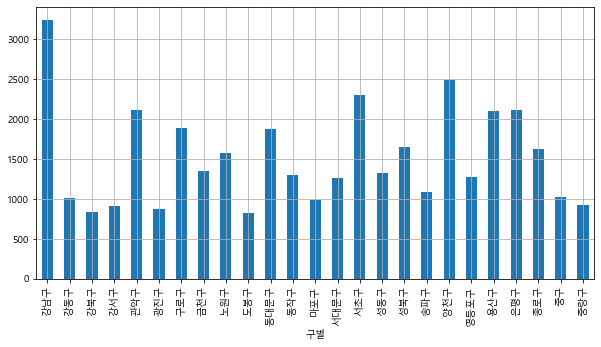

In [111]:
# CCTV가 많이 설치된 구별로 그래프 그리기
data_result["소계"].plot(kind="bar")
data_result["소계"].plot.bar
data_result["소계"].plot(kind="bar",figsize=(10,5),grid=True)

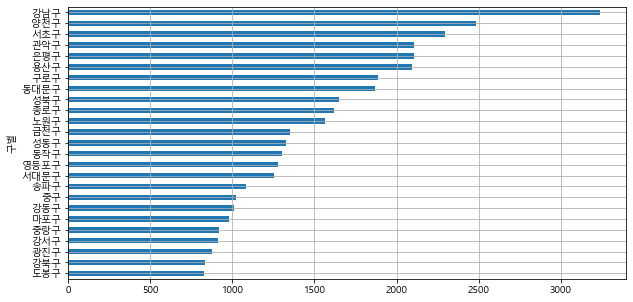

In [117]:
data_result["소계"].sort_values().plot(kind="barh",figsize=(10,5),grid=True)      # 오름차순

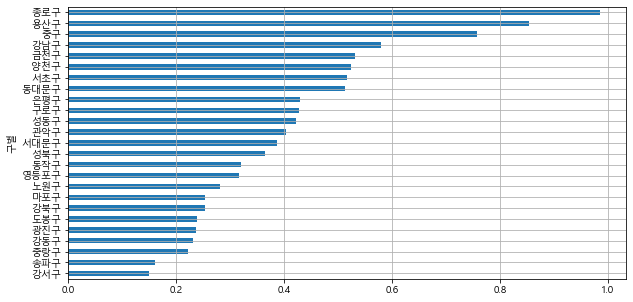

In [137]:
# CCTV비율을 그래프로 확인
data_result["CCTV 비율"].sort_values().plot(kind = 'barh', figsize=(10,5),grid=True)

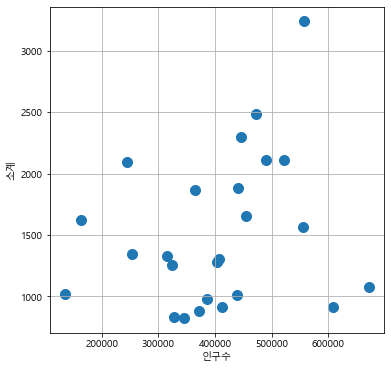

In [138]:
# CCTV 설치 대수와 인구수의 관계를 그래프로 확인
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"],s=100)
plt.xlabel("인구수")
plt.ylabel("소계")
plt.grid()
plt.show()

In [135]:
# poly1d : 1차 방정식을 만들어주는 함수 (직선)

print(np.poly1d([1,2]))
print(np.poly1d([1,2,3]))

 
1 x + 2
   2
1 x + 2 x + 3


In [149]:
# 회귀선 작성 : polyfit()
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)  # 1차 방정식의 1
print(fp1)

f1=np.poly1d(fp1)
print(f1)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


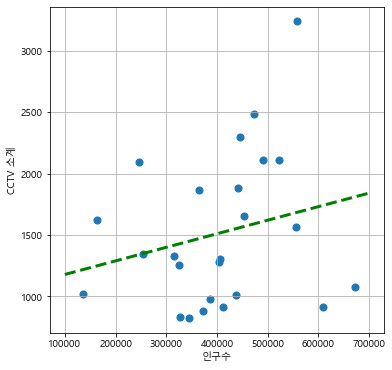

In [154]:
# 회귀선 작성 : polyfit()
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
# plt.plot(data_result['인구수'], f1(data_result['인구수']), ls='dashed', lw=3, color='g')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV 소계')
plt.grid()
plt.show()

In [162]:
# 각 데이터의 오차를 구해서 "오차" 컬럼 추가

data_result["오차"]= np.abs(data_result["소계"]-f1(data_result["인구수"]))   # 차이를 구할수 있게 절대값  np.abs()
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,1553.296412
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,542.582309
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,599.318223
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,829.467513
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,463.580517


In [164]:
df_sort = data_result.sort_values(by="오차",ascending= False)
df_sort.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,736.754790


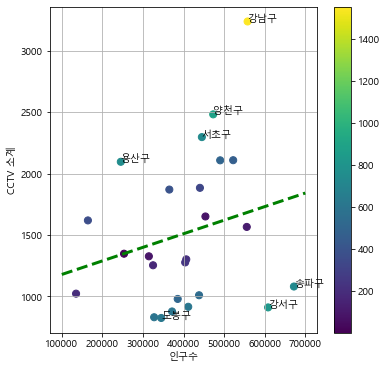

In [187]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50,
            c=data_result["오차"])
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV 소계')
plt.grid()
plt.colorbar()
# plt.text(df_sort["인구수"][3],df_sort["소계"][3],"용산구")
for n in range(7):
    plt.text(df_sort["인구수"][n],df_sort["소계"][n],df_sort.index[n],fontsize=10)

In [189]:
#최종 결과물 파일로 저장 
df_sort.to_csv("data/seoul/cctv_result_utf.csv",encoding='utf-8')
df_sort.to_csv("data/seoul/cctv_result_euc.csv",encoding='euc-kr')